In [ ]:
!pip install keras==2.9.0
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 22.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 438 kB 49.7 MB/s 
     |████████████████████████████████| 5.8 MB 50.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tenso

In [ ]:

import os
import shutil
from tensorflow.keras.utils import to_categorical
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.models import load_model
import re

from matplotlib import pyplot as plt

from numpy.random import seed
import tensorflow as tf
from tensorflow.keras import backend as k
import os
from IPython.display import Image
from sklearn.model_selection import train_test_split
import PIL

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
pathToImages = '/content/gdrive/MyDrive/TFM/data/set'
dirname = os.path.join(os.getcwd(), pathToImages)
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

img_height = 400
img_width = 600
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            #image = plt.imread(filepath)
            image = PIL.Image.open(filepath).convert('RGB')
            image = image.resize((img_height,img_width),PIL.Image.ANTIALIAS)
            image_array = img_to_array(image)
            images.append(image_array)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/gdrive/MyDrive/TFM/data/set/
/content/gdrive/MyDrive/TFM/data/set/error 1
/content/gdrive/MyDrive/TFM/data/set/front 163
/content/gdrive/MyDrive/TFM/data/set/back 288
/content/gdrive/MyDrive/TFM/data/set/passport 287
Directorios leidos: 4
Imagenes en cada directorio [164, 288, 287, 179]
suma Total de imagenes en subdirs: 918


In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  918
0 error
1 front
2 back
3 passport
Total number of outputs :  4
Output classes :  [0 1 2 3]


In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
 
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

#DATA AUMENGTATION TO TRAING AND VALIDATION EXISTENCE DATA
#Funcion de DataAumengtation para entrenar el modelo en pasos
train_generator = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        rescale = 1. / 255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

valid_generator = ImageDataGenerator(rescale = 1. / 255) 

Training data shape :  (734, 600, 400, 3) (734,)
Testing data shape :  (184, 600, 400, 3) (184,)
Original label: 0
After conversion to one-hot: [1. 0. 0. 0.]
(587, 600, 400, 3) (147, 600, 400, 3) (587, 4) (147, 4)


In [ ]:
#VARIABLES DEL MODELO
epochs = 100
batch_size = 32
learning_rate = 0.0003
channel = 3
input_shape=(img_height, img_width, channel)

#Callbacks to save the Keras model and load tensorboard
path_to_save = '/content/gdrive/MyDrive/TFM/modelos/'
callback_to_save_model = tf.keras.callbacks.ModelCheckpoint(filepath = path_to_save + 'model.{epoch:02d}-{val_loss:.2f}.h5')

In [ ]:
kernel_size = 5
def createModel():
  model = Sequential()

  #Primera capa
  model.add(Conv2D(16,(5,5),input_shape=(img_width,img_height,channel),activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(32,(5,5),activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64,(5,5),activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(528,activation='relu'))
  model.add(Dense(342,activation='relu'))
  model.add(Dense(128,activation='relu'))

  #Clasificación 
  model.add(Dense(4))
  model.add(Activation('softmax'))

  return model


In [ ]:
AdamOptimizer = optimizers.Adam(lr=learning_rate)

model = createModel()
model.compile(optimizer=AdamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#train_generator es el metodo de DataAumengtation declarado en el bloque anterior.
model_trained = model.fit_generator(train_generator.flow(train_X, train_label, batch_size=batch_size, shuffle = True), steps_per_epoch=len(train_X) // batch_size, epochs=epochs, verbose=1, callbacks=callback_to_save_model, validation_data=valid_generator.flow(valid_X, valid_label, shuffle = True), validation_steps=len(valid_X) // batch_size)

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
18/18 [==============================] - 43s 2s/step - loss: 1.3631 - accuracy: 0.3099 - val_loss: 1.3890 - val_accuracy: 0.2266
Epoch 2/100
18/18 [==============================] - 30s 2s/step - loss: 1.3356 - accuracy: 0.3171 - val_loss: 1.3660 - val_accuracy: 0.3359
Epoch 3/100
18/18 [==============================] - 30s 2s/step - loss: 1.3513 - accuracy: 0.3225 - val_loss: 1.4271 - val_accuracy: 0.3438
Epoch 4/100
18/18 [==============================] - 30s 2s/step - loss: 1.3467 - accuracy: 0.2919 - val_loss: 1.3918 - val_accuracy: 0.3438
Epoch 5/100
18/18 [==============================] - 30s 2s/step - loss: 1.3462 - accuracy: 0.3171 - val_loss: 1.3932 - val_accuracy: 0.3516
Epoch 6/100
18/18 [==============================] - 29s 2s/step - loss: 1.3412 - accuracy: 0.3333 - val_loss: 1.3839 - val_accuracy: 0.2266
Epoch 7/100
18/18 [==============================] - 31s 2s/step - loss: 1.3019 - accuracy: 0.3576 - val_loss: 1.2831 - val_accuracy: 0.3203
Epoch 8/100
1

In [ ]:
from sklearn.model_selection import StratifiedKFold
K = 5
skf = StratifiedKFold(n_splits = K)
skf.get_n_splits(train_X, train_label)

AdamOptimizer = optimizers.Adam(lr=learning_rate)

model = getModel()
model.compile(optimizer=AdamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])

i = 1
resultados = [] ## Array para salvar os resultados de cada execução do algoritmo

for train_index, test_index in skf.split(train_X, train_label):
  print("FOLD: ", i, "/", K, "TRAIN sets:", len(train_index), "TEST  sets:", len(test_index))
  i = i + 1

  X_train, X_test = train_X[train_index], train_X[test_index]
  y_train, y_test = train_label[train_index], train_label[test_index]

  model_trained = model.fit_generator(train_generator.flow(X_train, y_train, batch_size=batch_size, shuffle = True), steps_per_epoch=len(train_X) // batch_size, epochs=epochs, verbose=1, callbacks=callback_to_save_model, validation_data=valid_generator.flow(X_test, y_test, shuffle = True), validation_steps=len(valid_X) // batch_size)

  previsoes = classificador.predict(X_test)
  previsoes = (previsoes > 0.5) # Se a saida for > 0.5 -> classe 1 senão classe 0
  
  from sklearn.metrics import confusion_matrix, accuracy_score
  accuracy = accuracy_score(y_test, previsoes)
  matriz = confusion_matrix(y_test, previsoes)

  print('Accuracy: ', accuracy)
  print('Matriz de confusão:')
  print(matriz)
  
  resultados.append(accuracy)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored

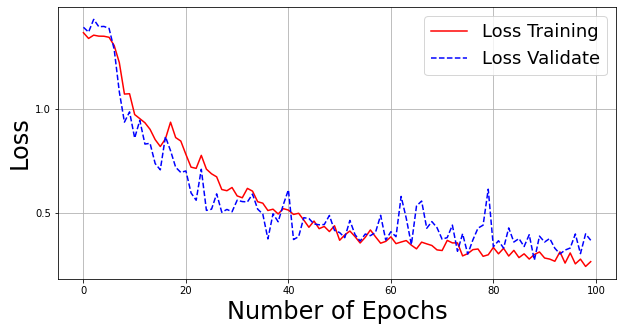

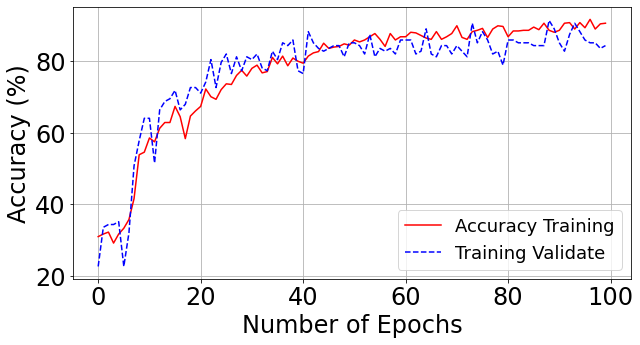

In [ ]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs) 
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

plotTraining(model_trained,epochs,"loss")
plotTraining(model_trained,epochs,"accuracy")
plotTraining(model_trained,epochs,"val_loss")
plotTraining(model_trained,epochs,"val_accuracy")

In [ ]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])



6/6 [==============================] - 1s 189ms/step - loss: 113.4406 - accuracy: 0.3967
Test loss: 113.44055938720703
Test accuracy: 0.39673912525177


In [ ]:

from sklearn.model_selection import StratifiedKFold
import numpy as np

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=seed)
cvscores  = []

for train, test in kfold.split(X, y):

  model = Sequential()

  #Primera capa
  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid",
        strides=1, input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D())

  #Segunda capa
  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid", strides=1))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D())

  model.add(Conv2D(64, 
        kernel_size=(kernel_size, kernel_size), padding="valid", strides=1))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D())  

  #Aplanar los datos
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))

  #Clasificación 
  model.add(Dense(4))
  model.add(Activation('softmax'))

  AdamOptimizer = optimizers.Adam(lr=learning_rate)

  model.summary()

  model.compile(optimizer=AdamOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #train_generator es el metodo de DataAumengtation declarado en el bloque anterior.
  model_trained = model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)

	# evaluate the model
  scores = model.evaluate(X[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 396, 596, 64)      4864      
                                                                 
 activation_25 (Activation)  (None, 396, 596, 64)      0         
                                                                 
 dropout_15 (Dropout)        (None, 396, 596, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 198, 298, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 194, 294, 64)      102464    
                                                                 
 activation_26 (Activation)  (None, 194, 294, 64)      0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 27 18:17:56 2021
pip install opencv-python <--------- instalar
@author: Daniela Sánchez
ORL database con validacion cruzada (StratifiedKFold)
"""
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)# Eliminar warning

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import time
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from PIL import Image
from google.colab import drive 
drive.mount('/content/gdrive') 




#ruta de la base de datos
#path='ORL/'
path='/content/gdrive/MyDrive/TFM/data/set' 

folders=40
imgs=[]
targets=[]
c=-1

for f in range(1,folders+1):
        folder = path+str(f)
        c+=1
        #print('Cargando imagenes de la carpeta '+str(f))
        for filename in os.listdir(folder):
            #imgR= folder+'/'+filename
            imgR = os.path.join(folder,filename)
            img = cv2.imread(imgR) 
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = Image.open(myFile).convert('RGB')
            # img = cv2.resize(img,(100,100))
            # print(imgR)
            if img_rgb is not None:
                imgs.append(img)
                targets.append(c)
                
                
#plt.imshow(img)
print('imagenes cargadas')


#[muestras][ancho][alto][canales] <===== en CNN
X=np.array(imgs)#.astype('float32')
targets=np.array(targets)#.astype('float32')
y = np_utils.to_categorical(targets)    

num_classes= y.shape[1]

height=400
width=600
channel=3

#reformateamos todas las imagenes, sin importar si son para entrenamiento,validacion o prueba
X= X.reshape(X.shape[0],height,width,channel).astype('float32')

start = time.time()


#Definimos el K fold, importante, creo que automaticamente da un 70/30 para train y test
kfold= StratifiedKFold(n_splits=5,shuffle=True)
cvscores = []

for train,test in kfold.split(X,targets):
    #definimos el modelo keras
    model= Sequential()
              #n mapas #filtro
    model.add(Conv2D(16,(5,5),input_shape=(width,height,channel),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32,(5,5),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64,(5,5),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(528,activation='relu'))
    model.add(Dense(342,activation='relu'))
    model.add(Dense(128,activation='relu'))
    #capa de salida (Si fuera binaria
    #model.add(Dense(1,activation='sigmoid')) #binaria
    #model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) #binaria
    #capa de salida
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    #De los datos para entrenamiento, saco para la validacion
    X_train,X_validation,y_train,y_validation = train_test_split(X[train],y[train],test_size=0.20) 
    # Entrenar
    # model.fit(X[train],y[train],epochs=10,batch_size=10,verbose=1) <---- si no tuviera conjunto para validacion
    # verbose=0 no muestra paso por paso
    model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=10,batch_size=20,verbose=0)# training / validation
    # Evaluar
    scores=model.evaluate(X[test],y[test],verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)



print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))
#print(model.metrics_names)

done = time.time()
elapsed = done - start

print("Time: %0.2f sec"%(elapsed))

print('listo')


Mounted at /content/gdrive


FileNotFoundError: ignored

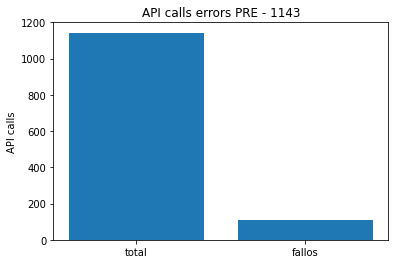

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = ['total', 'fallos']
y = [1143, 110]

fig, ax = plt.subplots()
ax.set_ylabel('API calls')
#Colocamos una etiqueta en el eje X
ax.set_title('API calls errors PRE - 1143')

plt.bar(x, y)
plt.show()

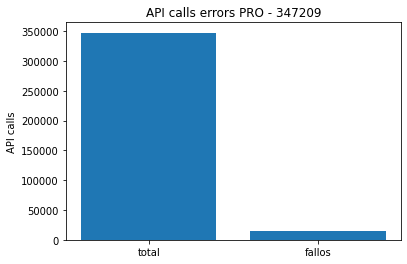

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = ['total', 'fallos']
y = [347209, 14393]

fig, ax = plt.subplots()
ax.set_ylabel('API calls')
#Colocamos una etiqueta en el eje X
ax.set_title('API calls errors PRO - 347209')

plt.bar(x, y)
plt.show()

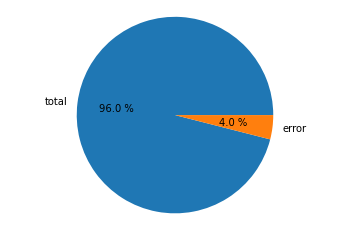

In [ ]:
import matplotlib.pyplot as plt

amounts = [347209, 14393]
labels = ["total","error"]
plt.pie(amounts, labels=labels, autopct="%0.1f %%")
plt.axis("equal")
plt.show()


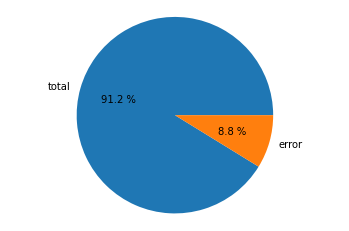

In [ ]:
import matplotlib.pyplot as plt

amounts = [1143, 110]
labels = ["total","error"]
plt.pie(amounts, labels=labels, autopct="%0.1f %%")
plt.axis("equal")
plt.show()